# SARIMAX Model

In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
%load_ext autoreload
%autoreload 2

## Import data

In [3]:
from electricity_price_predictor.data import get_all

In [4]:
df = get_all()
df.head()

,price,load,temp,feels_like,humidity,clouds_all,wind_speed,total_prod,wind_prod,wind_share,holiday
2015-01-01 11:00:00,16.08,2194.0,6.732469,-0.346708,93.413145,91.036933,8.724397,3909.281833,3183.801317,0.814421,1.0
2015-01-02 11:00:00,15.08,2673.0,6.849566,-2.364317,80.994869,52.392560,11.233930,4247.975683,3405.313993,0.801632,0.0
2015-01-03 11:00:00,22.31,2405.0,4.332541,-1.562728,88.760764,38.333790,6.187115,3391.054053,2380.964290,0.702131,0.0
2015-01-04 11:00:00,27.32,2383.0,3.296271,-2.594814,79.233305,11.509847,5.591671,3606.491107,2268.581247,0.629027,0.0
2015-01-05 11:00:00,40.97,3099.0,4.498201,1.665528,93.718424,88.775936,2.044551,2175.075494,234.576723,0.107848,0.0


In [39]:
df['net'] = df.total_prod - df.load

### Compare the trends of price and other features

#### Comparison before decomposition

Text(0, 0.5, 'total_production')

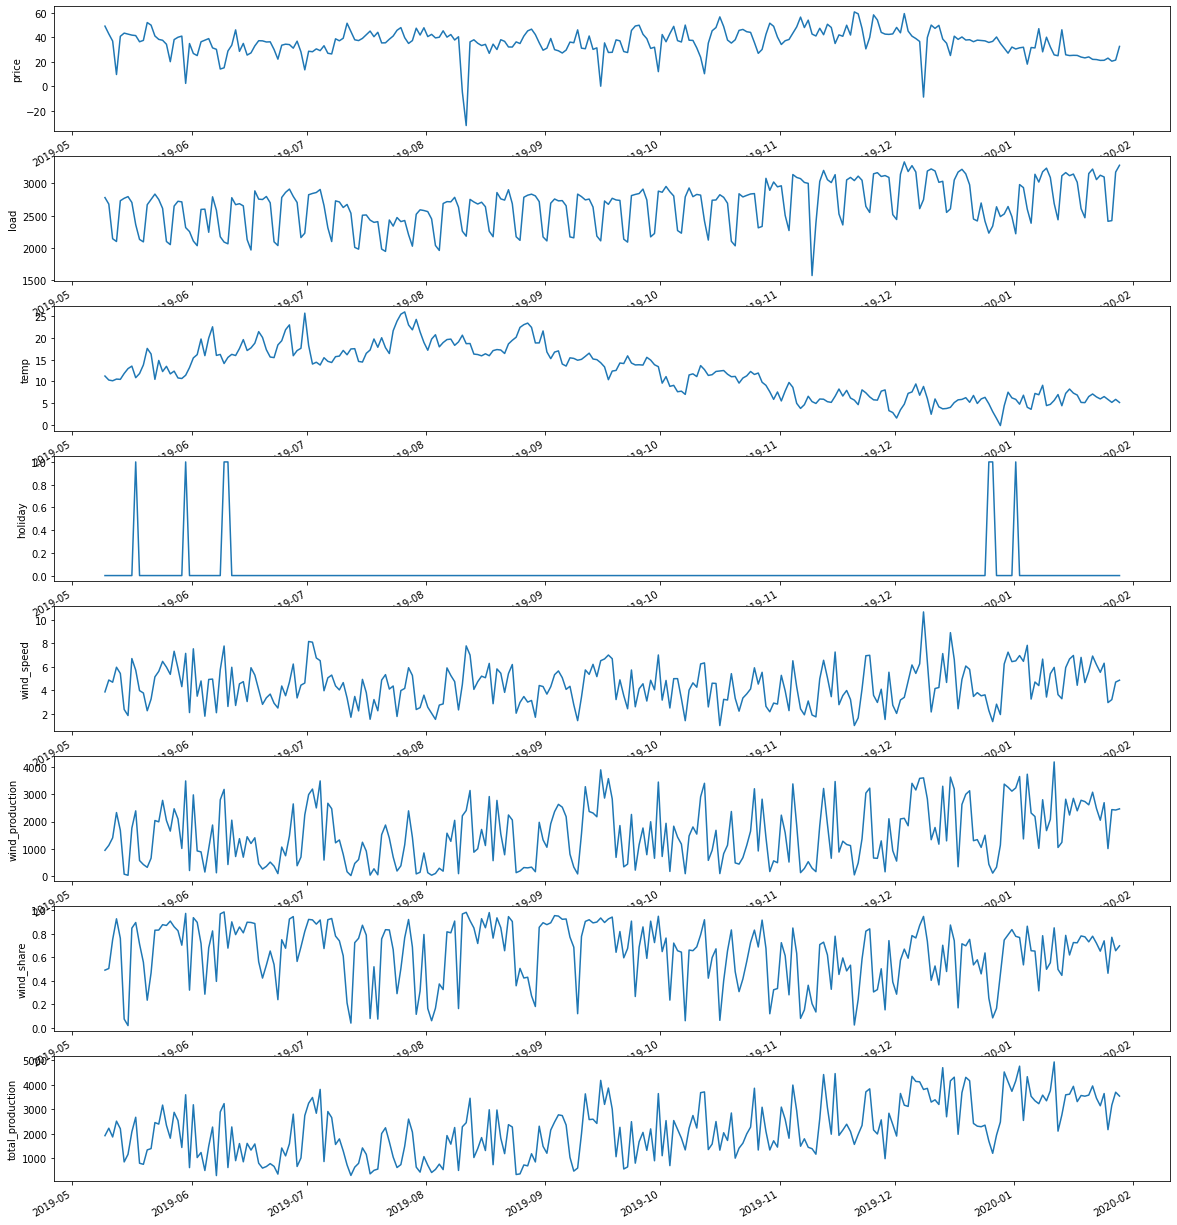

In [49]:
fig, ax = plt.subplots(8,1, figsize=(20,24))
df.price[-560:-295].plot(ax=ax[0])
ax[0].set_ylabel('price')
df.load[-560:-295].plot(ax=ax[1])
ax[1].set_ylabel('load')
df.temp[-560:-295].plot(ax=ax[2])
ax[2].set_ylabel('temp')
df.holiday[-560:-295].plot(ax=ax[3])
ax[3].set_ylabel('holiday')
df.wind_speed[-560:-295].plot(ax=ax[4])
ax[4].set_ylabel('wind_speed')
df.wind_prod[-560:-295].plot(ax=ax[5])
ax[5].set_ylabel('wind_production')
df.wind_share[-560:-295].plot(ax=ax[6])
ax[6].set_ylabel('wind_share')
df.total_prod[-560:-295].plot(ax=ax[7])
ax[7].set_ylabel('total_production')

- total production highly depends on wind production and wind production highly depends on wind_speed
- holidays seems to have impact on price
- need further decomposition for temp and load

#### Comparison after decomposition

In [6]:
# decompose price and load
decompose_price = seasonal_decompose(df['price'], model='additive')
decompose_load = seasonal_decompose(df['load'], model='additive')
decompose_temp = seasonal_decompose(df['temp'], model='additive')
decompose_wind_speed = seasonal_decompose(df['wind_speed'], model='additive')
decompose_wind_production = seasonal_decompose(df['wind_prod'], model='additive')
decompose_production = seasonal_decompose(df['total_prod'], model='additive')
decompose_holiday = seasonal_decompose(df['holiday'], model='additive')

**Trends in 5 years**

Text(0, 0.5, 'holiday')

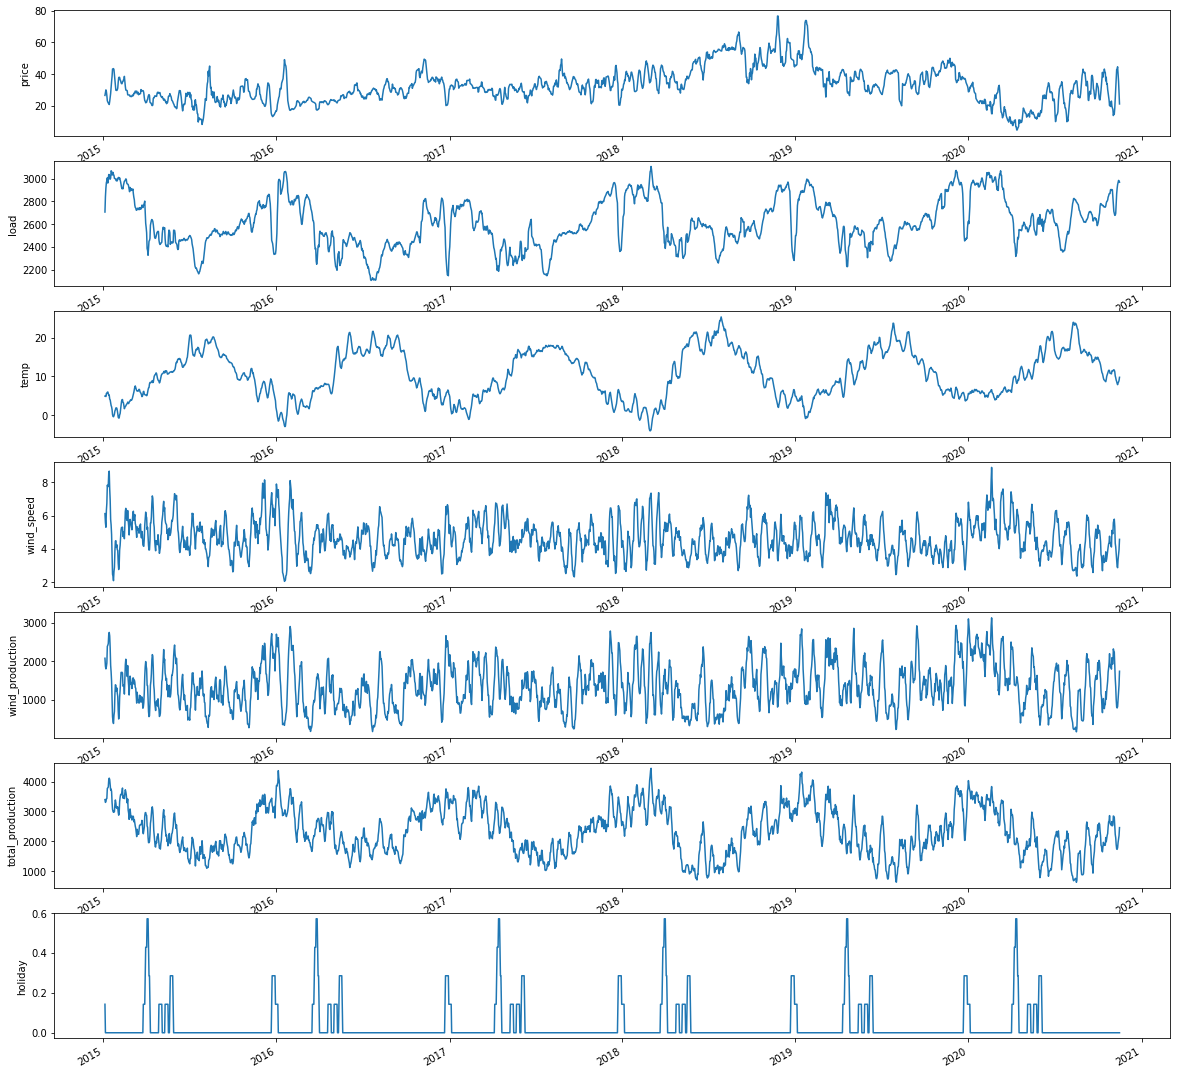

In [26]:
# compre the trends of all the above features
fig, ax = plt.subplots(7,1, figsize=(20,21))
decompose_price.trend.plot(ax=ax[0])
ax[0].set_ylabel('price')
decompose_load.trend.plot(ax=ax[1])
ax[1].set_ylabel('load')
decompose_temp.trend.plot(ax=ax[2])
ax[2].set_ylabel('temp')
decompose_wind_speed.trend.plot(ax=ax[3])
ax[3].set_ylabel('wind_speed')
decompose_wind_production.trend.plot(ax=ax[4])
ax[4].set_ylabel('wind_production')
decompose_production.trend.plot(ax=ax[5])
ax[5].set_ylabel('total_production')
decompose_holiday.trend.plot(ax=ax[6])
ax[6].set_ylabel('holiday')

- Load, temp and total production have clear seasonal seasonality

**Trends in 2019**

Text(0, 0.5, 'total_production')

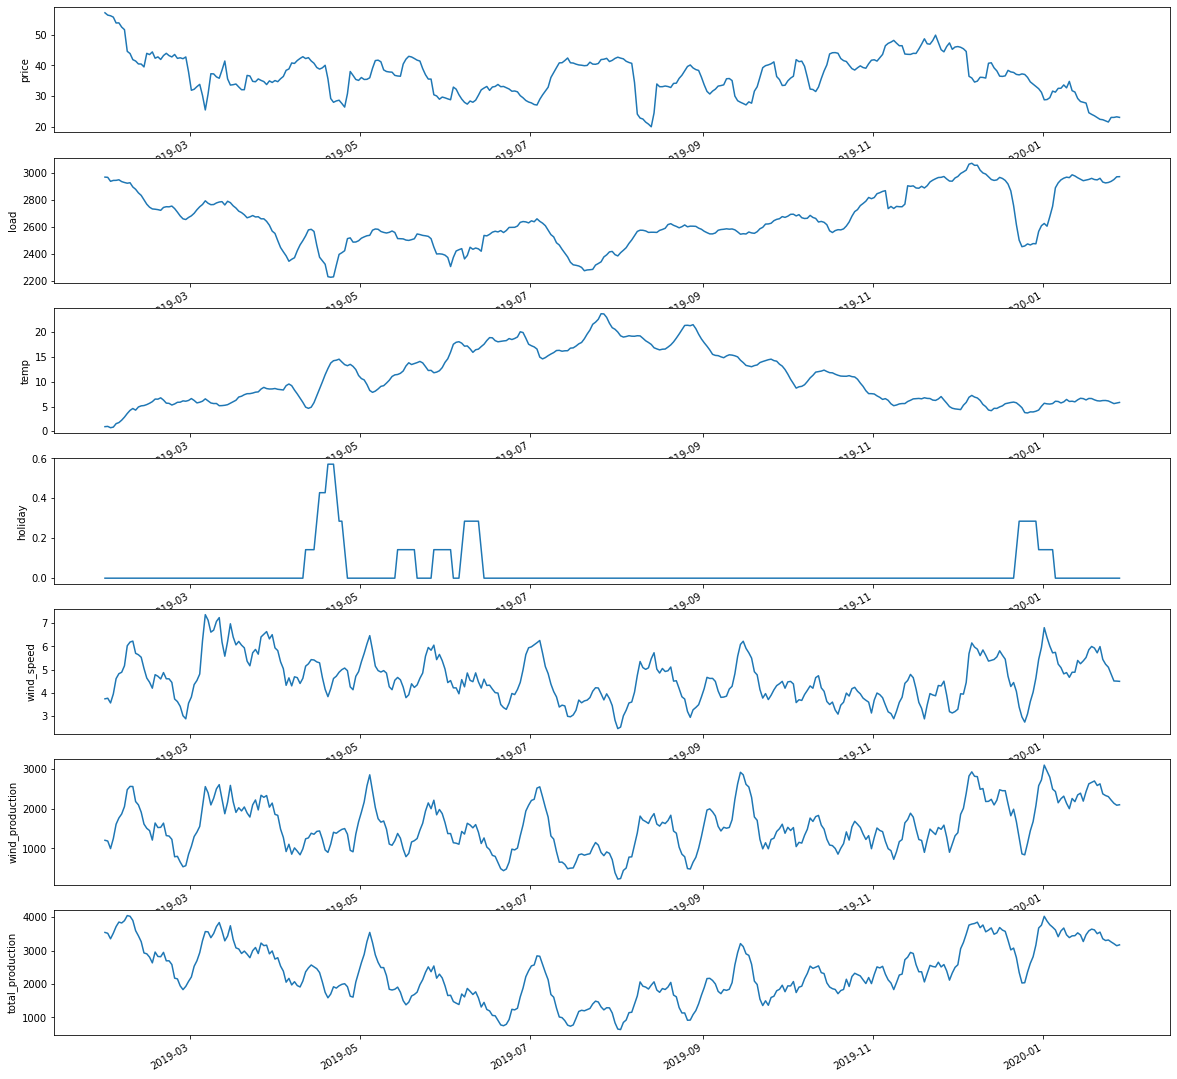

In [33]:
# compre the trends of all the above features
fig, ax = plt.subplots(7,1, figsize=(20,21))
decompose_price.trend[-660:-295].plot(ax=ax[0])
ax[0].set_ylabel('price')
decompose_load.trend[-660:-295].plot(ax=ax[1])
ax[1].set_ylabel('load')
decompose_temp.trend[-660:-295].plot(ax=ax[2])
ax[2].set_ylabel('temp')
decompose_holiday.trend[-660:-295].plot(ax=ax[3])
ax[3].set_ylabel('holiday')
decompose_wind_speed.trend[-660:-295].plot(ax=ax[4])
ax[4].set_ylabel('wind_speed')
decompose_wind_production.trend[-660:-295].plot(ax=ax[5])
ax[5].set_ylabel('wind_production')
decompose_production.trend[-660:-295].plot(ax=ax[6])
ax[6].set_ylabel('total_production')

- part of price trend can be captured by load whose trend 

**Residuals in 2019**

Text(0, 0.5, 'total_production')

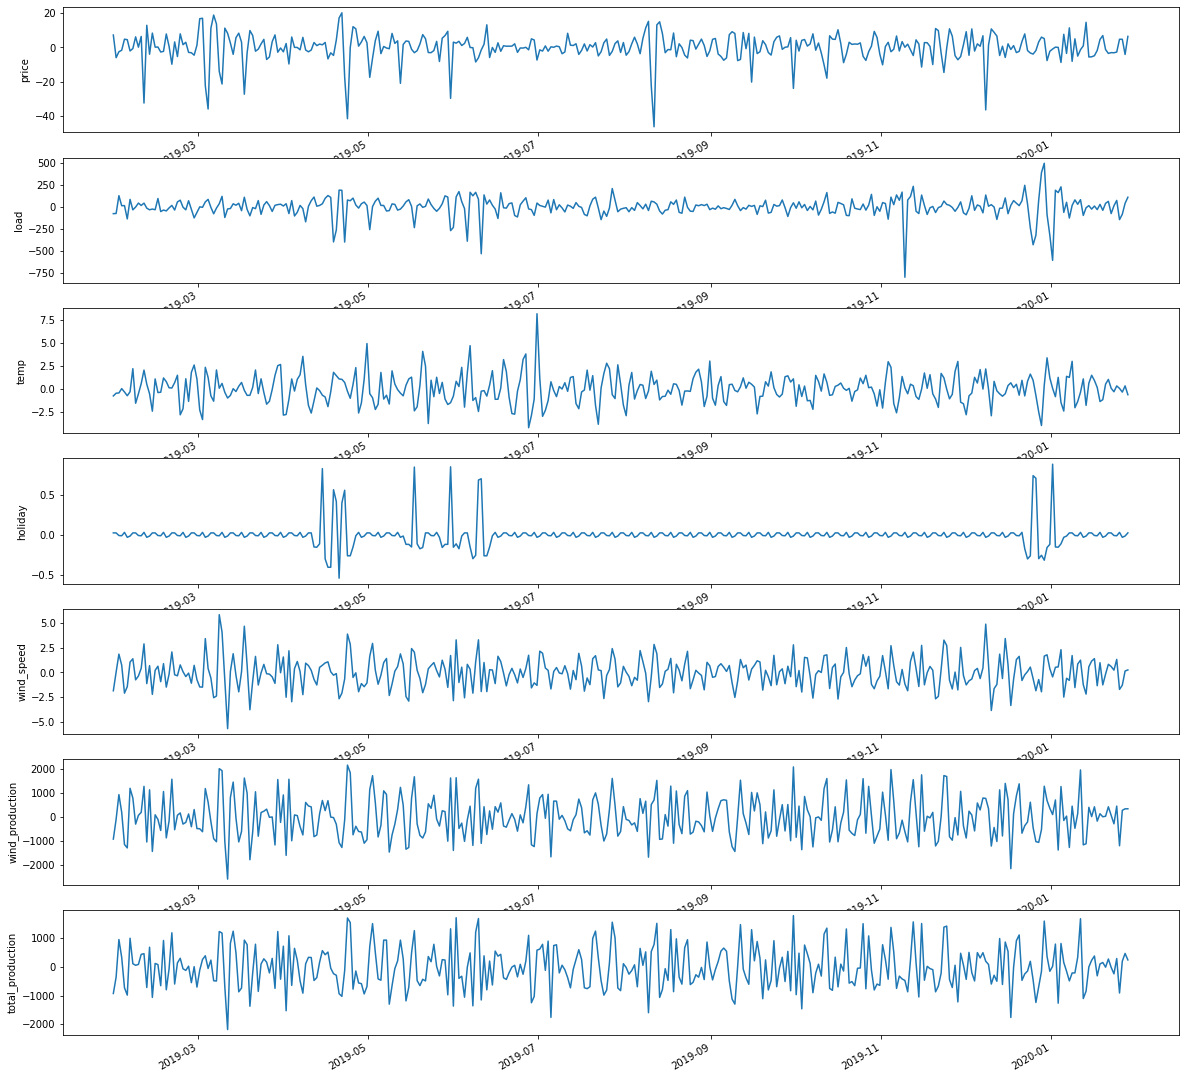

In [34]:
# compre the residuals of all the above features
fig, ax = plt.subplots(7,1, figsize=(20,21))
decompose_price.resid[-660:-295].plot(ax=ax[0])
ax[0].set_ylabel('price')
decompose_load.resid[-660:-295].plot(ax=ax[1])
ax[1].set_ylabel('load')
decompose_temp.resid[-660:-295].plot(ax=ax[2])
ax[2].set_ylabel('temp')
decompose_holiday.resid[-660:-295].plot(ax=ax[3])
ax[3].set_ylabel('holiday')
decompose_wind_speed.resid[-660:-295].plot(ax=ax[4])
ax[4].set_ylabel('wind_speed')
decompose_wind_production.resid[-660:-295].plot(ax=ax[5])
ax[5].set_ylabel('wind_production')
decompose_production.resid[-660:-295].plot(ax=ax[6])
ax[6].set_ylabel('total_production')

### Grid search

In [ ]:
# Grid search hyper params
model = pm.auto_arima(df_price_11, 
                       exogenous=df_load_11,
                       seasonal=True, m=7, 
                       start_p=0, max_p=2, start_q=0, max_q=2,
                       start_P=0, max_P=2, start_Q=0, max_Q=2, 
                       trace=True,suppress_warnings=True)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build Model
sarima = SARIMAX(train_df,
                 order=(3, 0, 0),seasonal_order=(0,1,2,12)
                )
sarima = sarima.fit()

# Forecast
results = sarima.get_forecast(len(test_df), alpha=0.05) # 95% confidence
forecast = results.predicted_mean
confidence_int = results.conf_int()

In [ ]:
plot_forecast(forecast, train_df, test_df)

# Prophet

[reference for model_b](https://towardsdatascience.com/multivariate-time-series-forecasting-using-random-forest-2372f3ecbad1)